# CISC/CMPE 452/COGS 400 Assignment 1 - Perceptron (10 points)  

Please put your name and student id here

    Evan Cohen, #20214967

- The notebook file has clearly marked blocks where you are expected to write code. Do not write or modify any code outside of these blocks.
- Make sure to restart and run all the cells from the beginning before submission. Do not clear out the outputs.
- Mark will be deducted based on late policy (-1% of the course total marks per day after due date until the end date after which no assignments will be accepted)



### Build Model (6 points)  
Implement **Simple Feedback Learning** for emotion classification (dataset from: https://www.kaggle.com/praveengovi/emotions-dataset-for-nlp)

Use the correct/incorrect feedback and info about (y>d) or (y<d) to change weights.  
Refer to the **Perceptron slides**  

- 1. Implement forward and calculate the output (2 point)  
- 2. Update the weights and bias (2 points)  
- 3. Predict function (1 point)  
- 4. Activation function (1 point)  

### Evaluator Function (2 point)  
Implement the evaluator function with Pytorch or Numpy only   
- Evaluation metrics include confusion matrix, accuracy, recall score, precision and F1 score

### Train and Evaluate the Model (2 point)  
Train the model with customized learning rate and number of iterations  
Use the predict function to predict the labels with the test dataset  
Evaluate the prediction results  
- Evaluation metrics include confusion matrix, accuracy, recall score, precision and F1 score


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load dataset
df_train = pd.read_csv('data/train.txt', names=['Text', 'Emotion'], sep=';')
df_test = pd.read_csv('data/test.txt', names=['Text', 'Emotion'], sep=';')

In [3]:
x_train = df_train['Text']
y_train = df_train['Emotion']

x_test = df_test['Text']
y_test = df_test['Emotion']

df_train.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [4]:
df_train.Emotion.value_counts()

Emotion
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

## Data Preprocessing

In [5]:
# encode label
y_train = y_train.replace({'joy':1, 'sadness':0, 'anger':0, 'fear':0, 'love':1, 'surprise':1})
y_test = y_test.replace({'joy':1, 'sadness':0, 'anger':0, 'fear':0, 'love':1, 'surprise':1})

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5)#, stop_words='english')

# We transform each text into a vector
x_train = tfidf.fit_transform(x_train).toarray()
x_test = tfidf.transform(x_test).toarray()

In [7]:
def evaluator(y_test, y_pred):
    ####################################################################################################
    # enter code here to implement the evaluation matrices including confusion matrix, accuracy, precision, recall and f1
    # DO NOT use any python packages such as scikit-learn
    
    TP = 0; TN = 0; FP = 0; FN = 0
    for i in range(len(y_test)):
        if y_test[i] == 1 and y_pred[i] == 1:
            TP += 1
        elif y_test[i] == 0 and y_pred[i] == 0:
            TN += 1
        elif y_test[i] == 0 and y_pred[i] == 1:
            FP += 1
        elif y_test[i] == 1 and y_pred[i] == 0:
            FN += 1
    print('TP: ', TP)
    print('TN: ', TN)
    print('FP: ', FP)
    print('FN: ', FN)
    print('Accuracy: ', (TP+TN)/(TP+TN+FP+FN))
    print('Precision: ', TP/(TP+FP))
    print('Recall: ', TP/(TP+FN))
    print('F1: ', 2*TP/(2*TP+FP+FN))
    

    ####################################################################################################
    


In [8]:
class SimpleFeedbackLearning(object):
    def __init__(self):
        self.history = {}
        self.history['train_acc'] = []
        self.history['test_acc'] = []
        
    def f(self, x):
        ####################################################################################################
        # 4. enter code here to implement the activation function
      
        fx = 1/(1+np.exp(-x))


        ####################################################################################################
        return fx
    
    def train(self, x, y, x_test, y_test, learning_rate=0.1, n_iters=10, verbose=True):
        n_train, input_size = x.shape
        n_test = x_test.shape[0]
        # weight initialization
        self.W = np.zeros(input_size)
        self.b = np.zeros(1)

        for i in range(n_iters):
            for xi, yi in zip(x, y):
                # forward
                ####################################################################################################
                # 1. enter code here to calculate the output
                output = self.f(np.dot(xi.ravel(), self.W) + self.b)

                ####################################################################################################

                ####################################################################################################
                # 2. enter code here to adjust the weights and bias

                self.W = self.W + learning_rate * (yi - output) * xi
                self.b = self.b + learning_rate * (yi - output)

                ####################################################################################################

            train_acc = (self.predict(x) == y).sum() / n_train
            test_acc = (self.predict(x_test) == y_test).sum() / n_test
            self.history['train_acc'].append(train_acc)
            self.history['test_acc'].append(test_acc)
            if verbose:
                print('epoch %d, train acc %.4f, test acc %.4f' % (i + 1, train_acc, test_acc))

    def predict(self, x):
        ####################################################################################################
        # 3. enter code here to complete the predict function
        # TODO: use the trained weights to predict labels and return the predicted labels
        y_pred = []
        for xi in x:
            output = self.f(np.dot(xi, self.W) + self.b)
            output = np.round(output)
            y_pred.append(int(output))
        ####################################################################################################
        return y_pred

In [9]:
####################################################################################################
# enter code here to initialize and train the model

model = SimpleFeedbackLearning()
model.train(x_train, y_train, x_test, y_test, learning_rate=0.01, n_iters=50, verbose=True)

####################################################################################################


epoch 1, train acc 0.5504, test acc 0.5410
epoch 2, train acc 0.6244, test acc 0.6105
epoch 3, train acc 0.6989, test acc 0.6870
epoch 4, train acc 0.7484, test acc 0.7420
epoch 5, train acc 0.7819, test acc 0.7740
epoch 6, train acc 0.8060, test acc 0.8000
epoch 7, train acc 0.8239, test acc 0.8245
epoch 8, train acc 0.8383, test acc 0.8395
epoch 9, train acc 0.8514, test acc 0.8490
epoch 10, train acc 0.8616, test acc 0.8585
epoch 11, train acc 0.8693, test acc 0.8620
epoch 12, train acc 0.8774, test acc 0.8725
epoch 13, train acc 0.8845, test acc 0.8785
epoch 14, train acc 0.8901, test acc 0.8835
epoch 15, train acc 0.8951, test acc 0.8875
epoch 16, train acc 0.9003, test acc 0.8915
epoch 17, train acc 0.9050, test acc 0.8985
epoch 18, train acc 0.9086, test acc 0.9005
epoch 19, train acc 0.9114, test acc 0.9025
epoch 20, train acc 0.9146, test acc 0.9040
epoch 21, train acc 0.9174, test acc 0.9080
epoch 22, train acc 0.9196, test acc 0.9100
epoch 23, train acc 0.9227, test acc 0.91

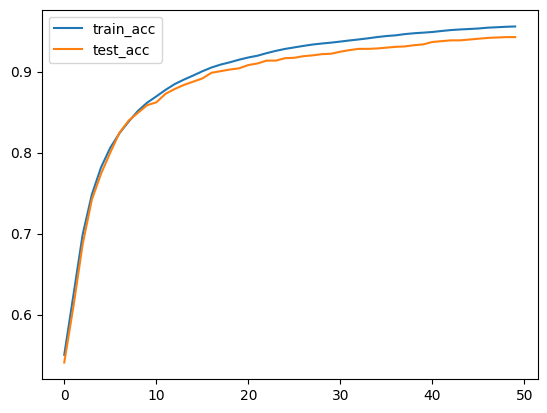

In [10]:
# plot the accuracy
plt.plot(model.history['train_acc'], label='train_acc')
plt.plot(model.history['test_acc'], label='test_acc')
plt.legend()
plt.show()

In [11]:
####################################################################################################
# enter code here to evaluate the model with the evaluator function

y_pred = model.predict(x_test)
evaluator(y_test, y_pred)

####################################################################################################

TP:  849
TN:  1036
FP:  44
FN:  71
Accuracy:  0.9425
Precision:  0.9507278835386338
Recall:  0.9228260869565217
F1:  0.936569222283508
